# Univariate Resemblance Analysis (URA) 
In this notebook the univariate resemblance analysis  is performed for all STDG approaches.

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = 'C:/Users/27261/Desktop/prostate/code-0126/' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
# from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [4]:
#Define global variables
HOME_PATH = 'C:/Users/27261/Desktop/prostate/code-0126/'
DATA_TYPES = ['Real','GM','SDV-FML','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV-FML','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'Dataset_cedric/Train.csv',
            'GM' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/GM.csv',
            'SDV-FML' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/SDV-FML.csv',
            'CTGAN' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/CTGAN.csv',
            'WGANGP' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/WGANGP.csv'}
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
data = dict()

In [5]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      eadnr (I)        Age Multifocaal  \
 0     74911959  60.254795           0   
 1     72364086  66.391781           1   
 2     72845225  69.010959           0   
 3     65384463  41.136986           0   
 4     83257287  74.665753           0   
 ..         ...        ...         ...   
 228   77679900  68.350685           0   
 229   70544747  73.531507           0   
 230   88824362  65.734247           0   
 231   61072681  60.189041           0   
 232   89901847  69.282192           1   
 
     1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)  Preoperatief PSA  \
 0                                                    3              1.90   
 1                                                    3              4.02   
 2                                                    1              4.60   
 3                                                    3              5.00   
 4                                                    1             10.90   
 ..                     

## 2. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [6]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

31

In [7]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

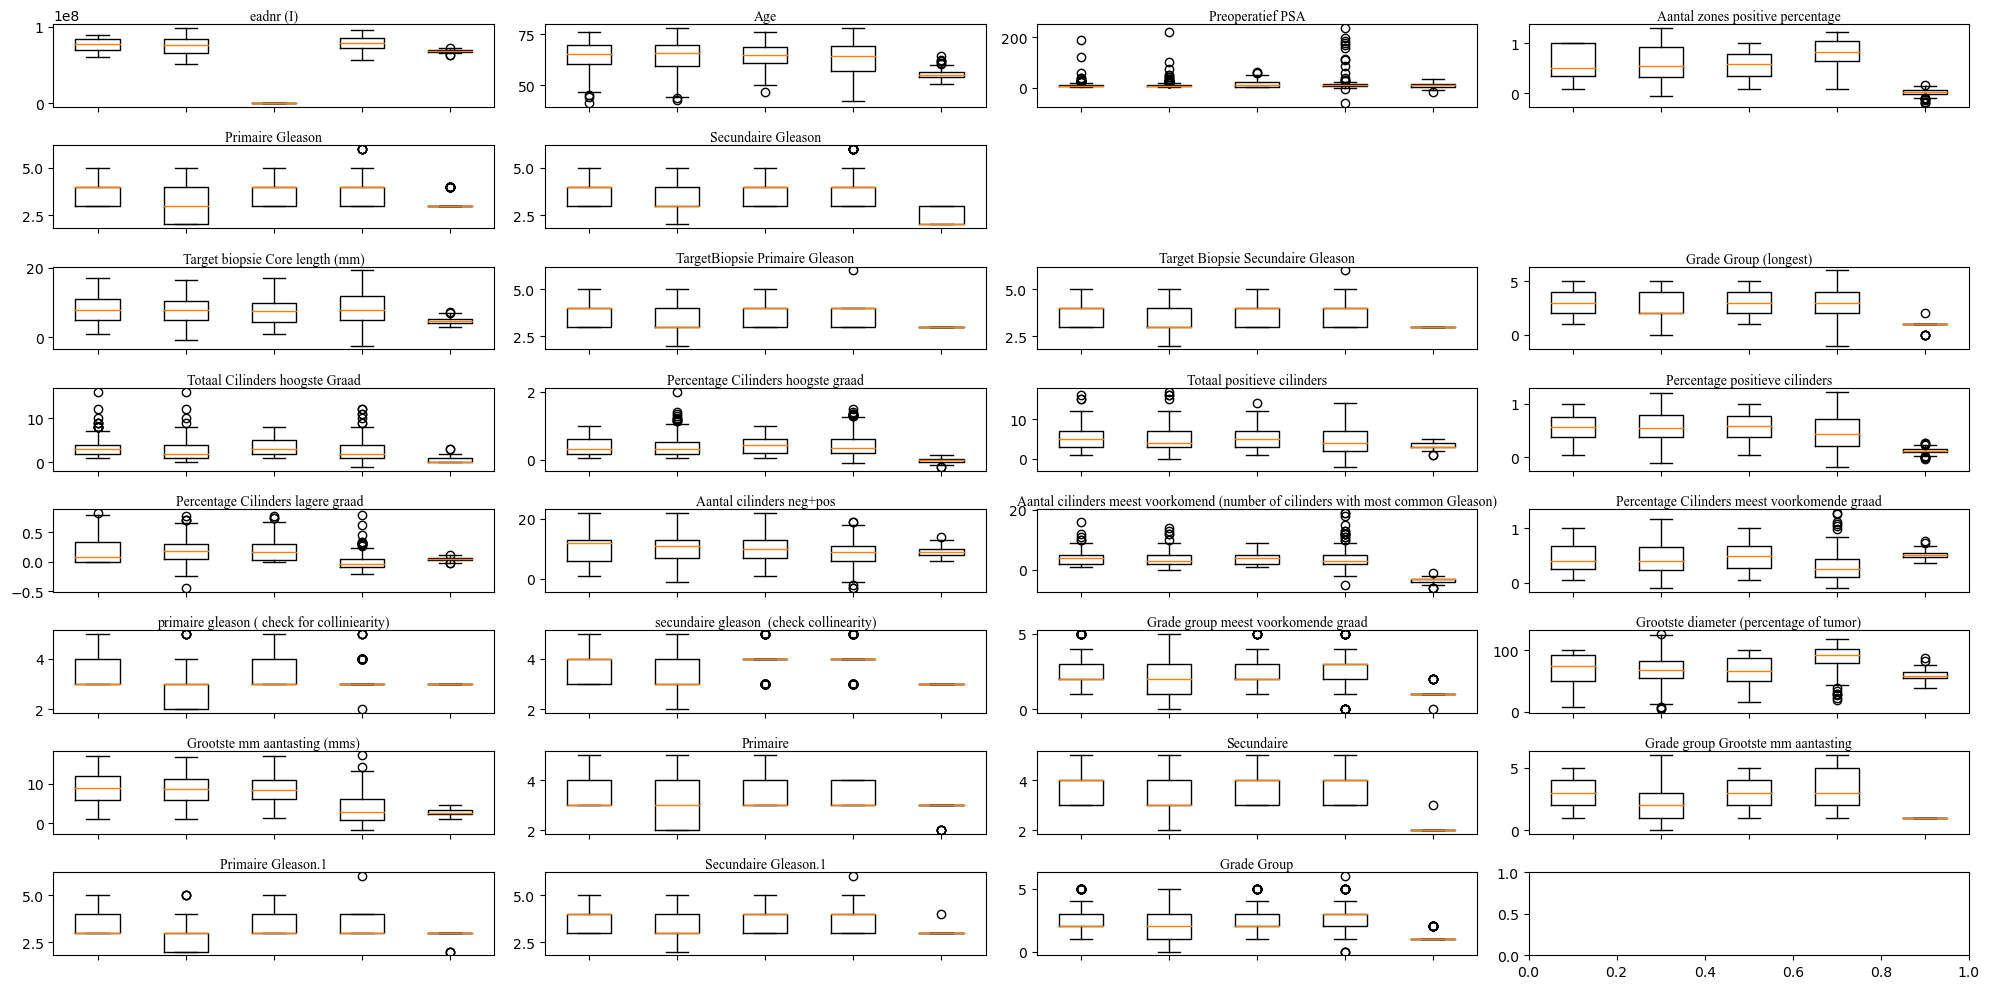

In [8]:
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(20,10))
idx = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1],[1,2],[1,3],[2, 0], [2, 1], [2, 2], [2, 3],[3, 0], [3, 1], [3, 2], [3, 3],[4, 0], [4, 1], [4, 2], [4, 3],[5, 0], [5, 1], [5, 2], [5, 3],[6, 0], [6, 1], [6, 2], [6, 3],[7, 0], [7, 1], [7, 2]]
idx = dict(zip(columns,idx))

for i in range(0,len(columns)):
    ax = axs[idx[columns[i]][0], idx[columns[i]][1]]
    ax.boxplot(boxplots_data[columns[i]])
    ax.set_title(columns[i], fontsize=10, fontdict={'fontname': 'Times New Roman'}, y=0.95)
    ax.set_xticklabels([])
    #ax.set_xticklabels(DATA_TYPES)
    
# for ax in axs.ravel():
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
    
fig.delaxes(axs[1,2])
fig.delaxes(axs[1,3])
fig.tight_layout()

# fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.svg', bbox_inches='tight')

In [9]:
data["SDV-FML"]["eadnr (I)"]

0      600
1      601
2      602
3      603
4      604
      ... 
228    828
229    829
230    830
231    831
232    832
Name: eadnr (I), Length: 233, dtype: int64

No.3's eadnr(I) is fine, it's just different: 600 - 832, one by one, so it doesn't matter. No.5 indeed has many predictions that are similar

## 3. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [10]:
from IPython.display import HTML

# 设置CSS规则来自动换行单元格内容
style = """
<style>
    .dataframe td {
        white-space: nowrap;
        text-overflow: ellipsis;
        overflow: hidden;
        max-width: 100px;
    }
    .dataframe td:hover {
        white-space: normal;
        overflow: visible;
    }
</style>
"""

# 应用CSS样式
HTML(style)

In [11]:
def basic_stats(series):
    mean = series.mean()
    std = series.std()
    return mean, std

df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())

for name, df in data.items():
    # Select only numerical data from each DataFrame
    numerical_data = df.select_dtypes(include=['float64', 'int64'])
    # Initialize a dictionary to store the stats for the current DataFrame
    stats = {}
    # Calculate the stats for each column in the numerical data
    for column in numerical_data.columns:
        mean, std = basic_stats(numerical_data[column])
        # Store the stats in the dictionary using the column name as the key
        stats[column] = f'{mean:.2f} ± {std:.2f}'
    # Add the stats to the results DataFrame under the column name of the current DataFrame
    df_means_std[name] = pd.Series(stats)

# Print the final DataFrame
df_means_std = pd.DataFrame(df_means_std)
df_means_std

,Real,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),76041550.61 ± 9492569.19,75401072.38 ± 10665975.25,716.00 ± 67.41,78667236.12 ± 8659065.93,68338848.50 ± 1535925.35
Age,64.70 ± 6.51,64.67 ± 7.30,64.71 ± 6.13,63.09 ± 7.70,55.41 ± 2.20
Preoperatief PSA,11.17 ± 15.50,11.39 ± 17.36,13.61 ± 12.45,15.96 ± 31.15,10.26 ± 9.50
Aantal zones positive percentage,0.58 ± 0.30,0.59 ± 0.34,0.56 ± 0.28,0.81 ± 0.26,0.02 ± 0.06
Primaire Gleason,3.59 ± 0.56,3.11 ± 0.82,3.63 ± 0.57,3.64 ± 0.63,3.10 ± 0.30
Secundaire Gleason,3.86 ± 0.68,3.33 ± 0.83,3.73 ± 0.64,3.92 ± 0.85,2.48 ± 0.50
Grade group (highest),3.05 ± 1.12,2.61 ± 1.28,2.86 ± 0.94,2.95 ± 1.03,2.00 ± 0.26
Target biopsie Core length (perc),65.53 ± 26.78,65.31 ± 27.36,61.71 ± 25.42,63.47 ± 33.18,55.23 ± 6.35
Target biopsie Core length (mm),8.06 ± 3.75,7.83 ± 3.67,7.53 ± 3.72,8.27 ± 4.70,4.85 ± 0.87
TargetBiopsie Primaire Gleason,3.59 ± 0.54,3.14 ± 0.79,3.58 ± 0.53,3.64 ± 0.51,3.00 ± 0.00


## 4. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 4.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [16]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
# df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test.to_csv("C:/Users/27261/Desktop/Results/4.1student.csv", index=True)
df_student_test

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),4.938718e-01,0.000000,1.925430e-03,5.380515e-30
Age,9.559757e-01,0.987377,1.512270e-02,1.464856e-67
Preoperatief PSA,8.861172e-01,0.062375,3.643779e-02,4.436411e-01
Aantal zones positive percentage,7.344226e-01,0.475509,9.367655e-18,1.847232e-101
Primaire Gleason,7.401004e-13,0.510285,3.918015e-01,4.539713e-28
Secundaire Gleason,5.144671e-13,0.030327,3.688896e-01,8.221065e-87
Grade group (highest),7.015077e-05,0.049495,3.027228e-01,3.694130e-37
Target biopsie Core length (perc),9.307580e-01,0.114978,4.614966e-01,2.032869e-08
Target biopsie Core length (mm),4.972696e-01,0.125632,6.061750e-01,4.339748e-32
TargetBiopsie Primaire Gleason,1.571777e-12,0.729622,3.324283e-01,3.235280e-49


### 4.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [17]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('C:/Users/27261/Desktop/Results/4.2mann_whitney.csv')
df_mann_whitney

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),5.953349e-01,7.976168e-78,1.082554e-02,4.006617e-22
Age,9.632348e-01,5.882016e-01,3.735794e-02,1.106475e-52
Preoperatief PSA,5.182693e-01,1.698091e-01,3.448803e-03,4.340759e-01
Aantal zones positive percentage,5.347339e-01,4.569543e-01,1.434924e-16,7.824744e-77
Primaire Gleason,1.864432e-11,5.282475e-01,6.117394e-01,1.230673e-25
Secundaire Gleason,1.255534e-11,3.802802e-02,8.302513e-01,1.877837e-62
Grade group (highest),1.296062e-04,1.473554e-01,7.753693e-01,6.485882e-36
Target biopsie Core length (perc),9.391156e-01,6.613967e-02,6.948887e-01,3.047425e-08
Target biopsie Core length (mm),5.951922e-01,9.579228e-02,6.481676e-01,5.841378e-24
TargetBiopsie Primaire Gleason,8.234821e-11,7.769488e-01,2.703459e-01,1.143716e-41


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [18]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('C:/Users/27261/Desktop/Results/4.3ks_tests.csv')
df_ks

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),2.504150e-01,2.841436e-139,5.546523e-03,6.171551e-55
Age,7.209312e-01,3.223643e-02,1.390872e-02,2.467934e-65
Preoperatief PSA,4.910760e-01,3.840428e-08,2.185529e-04,1.695743e-05
Aantal zones positive percentage,2.185529e-04,2.185529e-04,2.461677e-17,5.392748e-116
Primaire Gleason,5.700277e-07,9.999991e-01,1.000000e+00,4.153288e-22
Secundaire Gleason,1.161403e-07,6.431209e-01,8.624122e-01,1.019223e-52
Grade group (highest),4.770741e-04,2.504150e-01,1.099104e-01,5.965009e-36
Target biopsie Core length (perc),3.578264e-01,4.192306e-02,1.856813e-02,4.901275e-30
Target biopsie Core length (mm),3.007756e-01,4.192306e-02,1.099104e-01,2.747177e-41
TargetBiopsie Primaire Gleason,1.073180e-05,1.000000e+00,7.209312e-01,7.932990e-35


### 3.4. Join all p-values of all tests in one unique dataset

In [33]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','WGANGP_S','GM_M','SDV_M','CTGAN_M','WGANGP_M','GM_K','SDV_K','CTGAN_K','WGANGP_K'])
df_tests_all.to_excel('C:/Users/27261/Desktop/Results/univariate_test1.xlsx')
df_tests_all

,GM_S,SDV_S,CTGAN_S,WGANGP_S,GM_M,SDV_M,CTGAN_M,WGANGP_M,GM_K,SDV_K,CTGAN_K,WGANGP_K
eadnr (I),0.4939,0.0000,0.0019,0.0000,0.5953,0.0000,0.0108,0.0000,0.2504,0.0000,0.0055,0.0
Age,0.9560,0.9874,0.0151,0.0000,0.9632,0.5882,0.0374,0.0000,0.7209,0.0322,0.0139,0.0
Preoperatief PSA,0.8861,0.0624,0.0364,0.4436,0.5183,0.1698,0.0034,0.4341,0.4911,0.0000,0.0002,0.0
Aantal zones positive percentage,0.7344,0.4755,0.0000,0.0000,0.5347,0.4570,0.0000,0.0000,0.0002,0.0002,0.0000,0.0
Primaire Gleason,0.0000,0.5103,0.3918,0.0000,0.0000,0.5282,0.6117,0.0000,0.0000,1.0000,1.0000,0.0
Secundaire Gleason,0.0000,0.0303,0.3689,0.0000,0.0000,0.0380,0.8303,0.0000,0.0000,0.6431,0.8624,0.0
Grade group (highest),0.0001,0.0495,0.3027,0.0000,0.0001,0.1474,0.7754,0.0000,0.0005,0.2504,0.1099,0.0
Target biopsie Core length (perc),0.9308,0.1150,0.4615,0.0000,0.9391,0.0661,0.6949,0.0000,0.3578,0.0419,0.0186,0.0
Target biopsie Core length (mm),0.4973,0.1256,0.6062,0.0000,0.5952,0.0958,0.6482,0.0000,0.3008,0.0419,0.1099,0.0
TargetBiopsie Primaire Gleason,0.0000,0.7296,0.3324,0.0000,0.0000,0.7769,0.2703,0.0000,0.0000,1.0000,0.7209,0.0


### 4.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [20]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('C:/Users/27261/Desktop/Results/chi_squared_tests.csv')
df_chi

,GM,SDV-FML,CTGAN,WGANGP
Multifocaal,0.763261,0.240894,0.625865,1.000000
1c (0) - Perifeer (1) - Beide (2) - Transitie (3),0.895473,0.753488,0.833576,0.060632
pN,1.000000,0.886784,0.337924,0.790304
cT(MRI),0.907206,0.346610,0.718712,0.930185


For data-type variables, the results for similar variables are basically the same. For categorical variables, they are all p>0,05, indicating that they come from different distributions.

## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [22]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':      eadnr (I)       Age  Preoperatief PSA  Aantal zones positive percentage  \
 0     0.496160  0.546009          0.003170                          0.236364   
 1     0.410982  0.721283          0.014369                          0.236364   
 2     0.427067  0.796088          0.017433                          0.181818   
 3     0.177647  0.000000          0.019546                          0.636364   
 4     0.775152  0.957590          0.050713                          1.000000   
 ..         ...       ...               ...                               ...   
 228   0.588695  0.777230          0.019070                          0.454545   
 229   0.350160  0.925196          0.044374                          1.000000   
 230   0.961265  0.702504          0.047544                          1.000000   
 231   0.033500  0.544131          0.050185                          0.127273   
 232   0.997286  0.803834          0.033809                          0.702479   
 
      Primaire Gle

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [23]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
# df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),6.152791,6.659136,5.673936,5.280658
Age,4.266935,4.372416,4.406361,6.032521
Preoperatief PSA,1.724637,3.898569,3.792402,7.960779
Aantal zones positive percentage,6.305175,6.845334,6.368457,5.632227
Primaire Gleason,6.078194,6.284903,5.410894,6.964194
Secundaire Gleason,6.674995,7.123903,7.264832,9.695360
Grade group (highest),5.555178,5.350234,4.844521,4.924429
Target biopsie Core length (perc),5.958952,5.699159,5.870430,6.300885
Target biopsie Core length (mm),5.054554,4.745159,4.915105,4.604643
TargetBiopsie Primaire Gleason,5.911383,5.958188,5.071708,6.123724


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [24]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
# df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),0.227958,0.262673,0.183682,0.168089
Age,0.083462,0.087987,0.089292,0.115331
Preoperatief PSA,0.723703,0.561270,0.512026,0.521665
Aantal zones positive percentage,0.235108,0.258853,0.200093,0.169841
Primaire Gleason,0.415545,0.493394,0.469651,0.769717
Secundaire Gleason,0.332084,0.403640,0.457203,0.499652
Grade group (highest),0.195469,0.195208,0.147899,0.164869
Target biopsie Core length (perc),0.172890,0.153277,0.168314,0.163695
Target biopsie Core length (mm),0.199413,0.203947,0.189992,0.184725
TargetBiopsie Primaire Gleason,0.396192,0.486108,0.429432,0.000000


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [25]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
# df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),0.069472,0.075999,0.067095,0.061282
Age,0.057356,0.059343,0.055181,0.046068
Preoperatief PSA,0.015452,0.024756,0.021220,0.036410
Aantal zones positive percentage,0.077787,0.086978,0.084137,0.073140
Primaire Gleason,0.051022,0.050737,0.041457,0.058729
Secundaire Gleason,0.072213,0.073382,0.073194,0.108757
Grade group (highest),0.071114,0.066334,0.063128,0.062721
Target biopsie Core length (perc),0.075582,0.075048,0.072324,0.063624
Target biopsie Core length (mm),0.054385,0.048252,0.052934,0.049611
TargetBiopsie Primaire Gleason,0.048364,0.043027,0.033758,0.030852


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [26]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
# df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV-FML,CTGAN,WGANGP
eadnr (I),0.085916,0.058733,0.092920,0.146116
Age,0.053766,0.075142,0.088047,0.312798
Preoperatief PSA,0.008395,0.155424,0.208748,0.481081
Aantal zones positive percentage,0.082034,0.053880,0.142609,0.181876
Primaire Gleason,0.150215,0.017167,0.098712,0.261803
Secundaire Gleason,0.170243,0.066524,0.135908,0.257511
Grade group (highest),0.093562,0.047210,0.144390,0.190987
Target biopsie Core length (perc),0.077799,0.046343,0.086298,0.250331
Target biopsie Core length (mm),0.056821,0.035773,0.051574,0.041565
TargetBiopsie Primaire Gleason,0.160229,0.008584,0.125894,0.296137


### 4.5. Join all distances in an unique dataframe

In [30]:
distances_all_data = np.round(np.concatenate([df_euclidean_dists,df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_E','SDV_E','CTGAN_E','WGANGP_E','GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_excel('C:/Users/27261/Desktop/Results/univariate_distance.xlsx')
df_dists_all

,GM_E,SDV_E,CTGAN_E,WGANGP_E,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
eadnr (I),6.1528,6.6591,5.6739,5.2807,0.2280,0.2627,0.1837,0.1681,0.0695,0.0760,0.0671,0.0613,0.0859,0.0587,0.0929,0.1461
Age,4.2669,4.3724,4.4064,6.0325,0.0835,0.0880,0.0893,0.1153,0.0574,0.0593,0.0552,0.0461,0.0538,0.0751,0.0880,0.3128
Preoperatief PSA,1.7246,3.8986,3.7924,7.9608,0.7237,0.5613,0.5120,0.5217,0.0155,0.0248,0.0212,0.0364,0.0084,0.1554,0.2087,0.4811
Aantal zones positive percentage,6.3052,6.8453,6.3685,5.6322,0.2351,0.2589,0.2001,0.1698,0.0778,0.0870,0.0841,0.0731,0.0820,0.0539,0.1426,0.1819
Primaire Gleason,6.0782,6.2849,5.4109,6.9642,0.4155,0.4934,0.4697,0.7697,0.0510,0.0507,0.0415,0.0587,0.1502,0.0172,0.0987,0.2618
Secundaire Gleason,6.6750,7.1239,7.2648,9.6954,0.3321,0.4036,0.4572,0.4997,0.0722,0.0734,0.0732,0.1088,0.1702,0.0665,0.1359,0.2575
Grade group (highest),5.5552,5.3502,4.8445,4.9244,0.1955,0.1952,0.1479,0.1649,0.0711,0.0663,0.0631,0.0627,0.0936,0.0472,0.1444,0.1910
Target biopsie Core length (perc),5.9590,5.6992,5.8704,6.3009,0.1729,0.1533,0.1683,0.1637,0.0756,0.0750,0.0723,0.0636,0.0778,0.0463,0.0863,0.2503
Target biopsie Core length (mm),5.0546,4.7452,4.9151,4.6046,0.1994,0.2039,0.1900,0.1847,0.0544,0.0483,0.0529,0.0496,0.0568,0.0358,0.0516,0.0416
TargetBiopsie Primaire Gleason,5.9114,5.9582,5.0717,6.1237,0.3962,0.4861,0.4294,0.0000,0.0484,0.0430,0.0338,0.0309,0.1602,0.0086,0.1259,0.2961


The conclusion is the same as the statistical test. Similar variables have closer distances.